In [82]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [83]:
dataset = pd.read_csv("dataset.csv")

In [84]:
dataset.head()

,Sl,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [85]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Sl               30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 852.0 bytes


In [86]:
dataset.size

90

In [87]:
dataset.isnull().sum()

Sl                 0
YearsExperience    0
Salary             0
dtype: int64

In [88]:
dataset.drop(columns=['Sl'], inplace=True)

In [89]:
dataset.head()

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


Text(0.5, 1.0, 'Years Of Experience VS Salary')

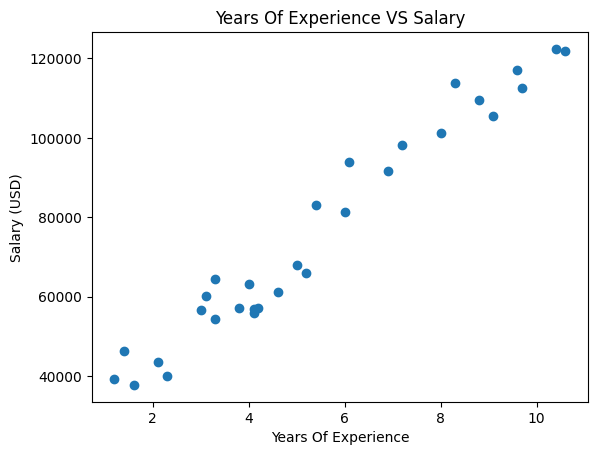

In [90]:
plt.scatter(x=dataset['YearsExperience'], y=dataset['Salary'])
plt.xlabel("Years Of Experience")
plt.ylabel("Salary (USD)")
plt.title("Years Of Experience VS Salary")

In [91]:
x = dataset.drop(columns=['Salary'], axis=1)
x.head()

,YearsExperience
0,1.2
1,1.4
2,1.6
3,2.1
4,2.3


In [92]:
y = dataset.drop(columns=['YearsExperience'], axis=1)
y.head()

,Salary
0,39344.0
1,46206.0
2,37732.0
3,43526.0
4,39892.0


In [93]:
reg = LinearRegression()

In [94]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [95]:
reg.fit(x_train, y_train)

LinearRegression()

In [96]:
y_pred = reg.predict(x_test)
y_pred

array([[ 75469.32301755],
       [ 38764.48355054],
       [108310.49517224],
       [100583.16054761],
       [111208.24565648],
       [ 36832.64989438]])

In [110]:
accuracy = reg.score(x_test, y_test)
accuracy

0.9632640618945609

In [101]:
dataset['perdicted_salary'] = reg.predict(x)

In [103]:
dataset.head()

,YearsExperience,Salary,perdicted_salary
0,1.2,39344.0,34900.816238
1,1.4,46206.0,36832.649894
2,1.6,37732.0,38764.483551
3,2.1,43526.0,43594.067691
4,2.3,39892.0,45525.901347


In [104]:
mean_squared_error_result = mean_squared_error(dataset['Salary'], dataset['perdicted_salary'])

In [105]:
mean_squared_error_result

np.float64(31776430.79121703)

In [107]:
mean_absolute_error_result = mean_absolute_error(dataset['Salary'], dataset['perdicted_salary'])

In [108]:
mean_absolute_error_result

np.float64(4616.594326075251)